### Introduction to ML - CMU Portugal Academy (2025)


## Students Performance Predictor and Clustering - Team Project

### Team - P.R.E.D.I.C.T. (Predictive Research Engineering & Data Insight Creation Team)
- Andrei
- Miguel Roque Fernandes
- Luís M. Costa


### Dataset Source
https://archive.ics.uci.edu/dataset/320/student+performance


In [1]:
# Install missing packages

! pip install ucimlrepo

zsh:1: command not found: pip


In [2]:
# Imports

import pandas as pd
import numpy as np
import os
import requests



from ucimlrepo import fetch_ucirepo 

In [3]:
# Import Data

# fetch dataset 
student_performance = fetch_ucirepo(id=320) 

In [13]:

# data (as pandas dataframes) 
X = student_performance.data.features 
y_original = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

# samples
X.head()

y_original.head()

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [ ]:
# Create a new target indicating fail/pass/good/excellent
def categorize_performance(grade):
    if grade < 10:
        return 'fail'
    elif 10 <= grade < 14:
        return 'pass'
    elif 14 <= grade < 18:
        return 'good'
    else:
        return 'excellent'

y = y_original["G3"].apply(categorize_performance)
y.value_counts()

G3
pass         355
good         177
fail         100
excellent     17
Name: count, dtype: int64

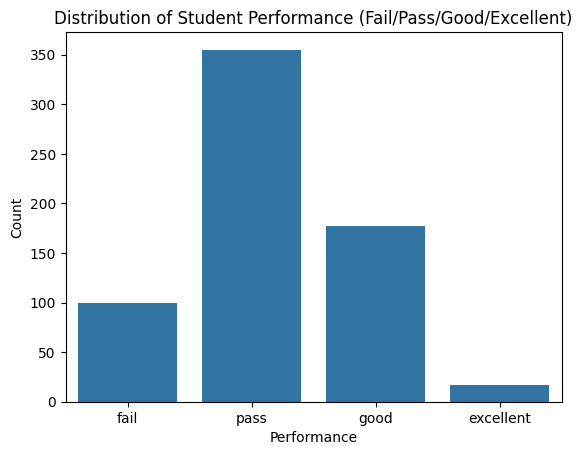

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot distribution of target variable while keeping order (fail, pass, good, excellent)
order = ['fail', 'pass', 'good', 'excellent']
sns.countplot(x=y, order=order)
plt.title("Distribution of Student Performance (Fail/Pass/Good/Excellent)")
plt.xlabel("Performance")
plt.ylabel("Count")
plt.show()